In [ ]:
%pip install pandas matplotlib 

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement sqlite3 (from versions: none)
ERROR: No matching distribution found for sqlite3


       name
0  Messages
Data type of 'sent_at': object


C:\Users\itsni\AppData\Local\Temp\ipykernel_23772\3742117650.py:17: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  messages_df['sent_at'] = pd.to_datetime(messages_df['sent_at'], errors='coerce')


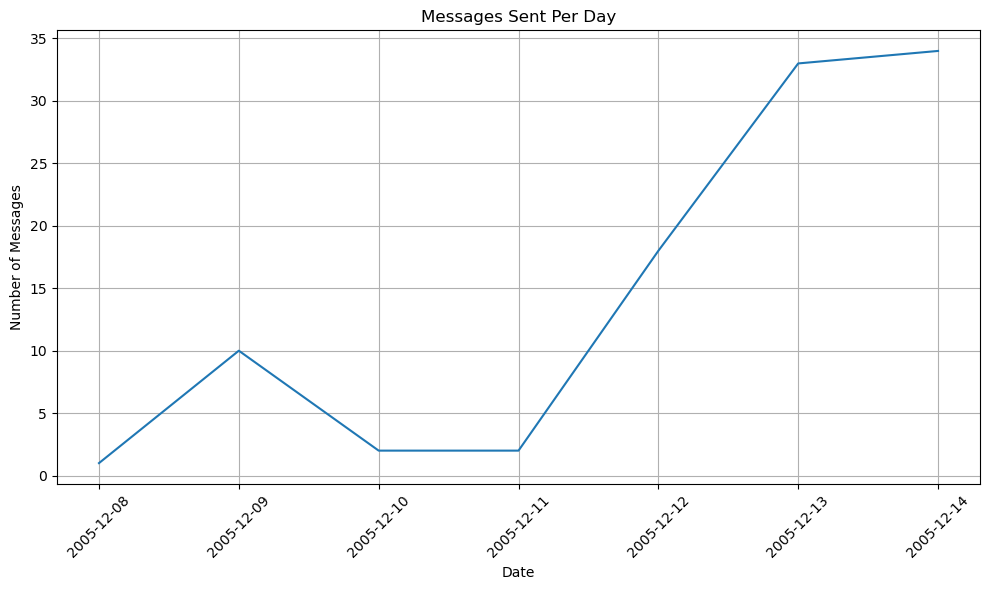

In [ ]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

conn = sqlite3.connect("content.sqlite")

tables = pd.read_sql("SELECT name FROM sqlite_master WHERE type='table'", conn)
print(tables)

if 'Messages' in tables['name'].values:
    query = "SELECT sent_at FROM Messages"
    messages_df = pd.read_sql(query, conn)


    messages_df['sent_at'] = pd.to_datetime(messages_df['sent_at'], errors='coerce')


    messages_df = messages_df.dropna(subset=['sent_at'])

    print("Data type of 'sent_at':", messages_df['sent_at'].dtype)


    messages_df['date'] = messages_df['sent_at'].apply(lambda x: x.date())

    grouped = messages_df.groupby('date').size()

    # Plot
    plt.figure(figsize=(10, 6))
    grouped.plot(kind='line')
    plt.title("Messages Sent Per Day")
    plt.xlabel("Date")
    plt.ylabel("Number of Messages")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print("Messages table not found.")

conn.close()